In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import pandas as pd
from pandas import DataFrame as df

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 8s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
train_Y = to_categorical(y_train, num_classes=10)
test_Y = to_categorical(y_test, num_classes=10)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range =0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    validation_split=0.2)


In [ ]:
batch_size = 32
steps_per_epoch= x_train.shape[0]//batch_size

In [ ]:
train_datagen.fit(x_train)

In [ ]:
Model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(32,32,3)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(32,32,3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation='relu',padding='same', input_shape=(32,32,3)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Conv2D(64, (3,3), activation='relu',padding='same', input_shape=(32,32,3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(128, (3,3), activation='relu',padding='same', input_shape=(32,32,3)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Conv2D(128, (3,3), activation='relu',padding='same', input_shape=(32,32,3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(rate=0.4), 
        #keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')

])

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
Model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
CNN = Model.fit(train_datagen.flow(x_train,train_Y,batch_size=32,subset='training'),
                validation_data = train_datagen.flow(x_test,test_Y,batch_size=8,subset='validation'),epochs=100)

Epoch 1/100
1250/1250 [==============================] - 55s 37ms/step - loss: 1.9497 - accuracy: 0.2851 - val_loss: 1.8065 - val_accuracy: 0.3480
Epoch 2/100
1250/1250 [==============================] - 47s 37ms/step - loss: 1.7186 - accuracy: 0.3711 - val_loss: 1.6094 - val_accuracy: 0.4095
Epoch 3/100
1250/1250 [==============================] - 47s 38ms/step - loss: 1.6071 - accuracy: 0.4108 - val_loss: 1.5368 - val_accuracy: 0.4550
Epoch 4/100
1250/1250 [==============================] - 46s 37ms/step - loss: 1.5260 - accuracy: 0.4458 - val_loss: 1.4114 - val_accuracy: 0.4945
Epoch 5/100
1250/1250 [==============================] - 47s 37ms/step - loss: 1.4541 - accuracy: 0.4745 - val_loss: 1.3445 - val_accuracy: 0.5200
Epoch 6/100
1250/1250 [==============================] - 47s 37ms/step - loss: 1.4178 - accuracy: 0.4895 - val_loss: 1.3557 - val_accuracy: 0.5175
Epoch 7/100
1250/1250 [==============================] - 46s 37ms/step - loss: 1.3753 - accuracy: 0.5062 - val_loss: 1

In [ ]:
Model.save("myaugmodel.h5")

In [ ]:
config = Model.get_config()

In [ ]:
Model.evaluate(x_test,test_Y)

313/313 [==============================] - 3s 9ms/step - loss: 2.4064 - accuracy: 0.3698


[2.4064204692840576, 0.36980000138282776]

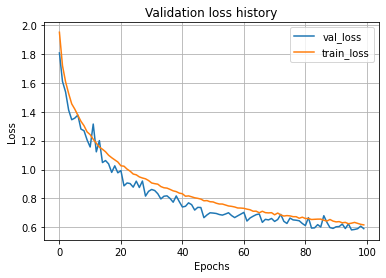

In [ ]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(x_train)
plt.plot(CNN.history['val_loss'], label="val_loss")
plt.plot(CNN.history['loss'], label="train_loss")
plt.title('Validation loss history')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

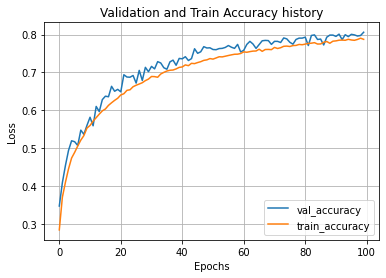

In [ ]:
#train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
#test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=False)
plt.plot(CNN.history['val_accuracy'], label="val_accuracy")
plt.plot(CNN.history['accuracy'], label="train_accuracy")
plt.title('Validation and Train Accuracy history')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

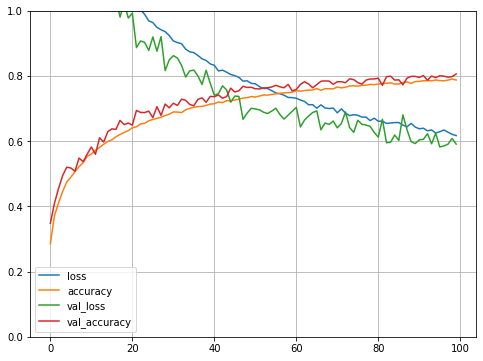

In [ ]:
import pandas as pd
pd.DataFrame(CNN.history).plot(figsize=(8,6))
plt.grid()
plt.gca().set_ylim(0,1)
plt.savefig("DataAugmentation")

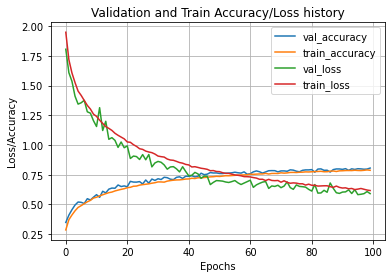

In [ ]:
plt.plot(CNN.history['val_accuracy'], label="val_accuracy")
plt.plot(CNN.history['accuracy'], label="train_accuracy")
plt.plot(CNN.history['val_loss'], label="val_loss")
plt.plot(CNN.history['loss'], label="train_loss")
plt.title('Validation and Train Accuracy/Loss history')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

END OF THE DATA AUGMENTATION PROGRAM.

In [ ]:
#training = datagen.flow(x_train,y_train,batch_size=32, shuffle=True, subset='training')

In [ ]:
#testing =datagen.flow(x_test,y_test,batch_size=64, shuffle=True ,subset='validation')

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint_filepath = "/tmp/checkpoint"
checkpoint

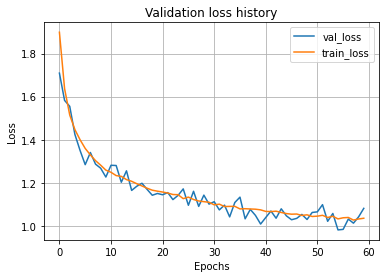

In [ ]:
plt.plot(history.history['val_loss'], label="val_loss")
plt.plot(history.history['loss'], label="train_loss")
plt.title('Validation loss history')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

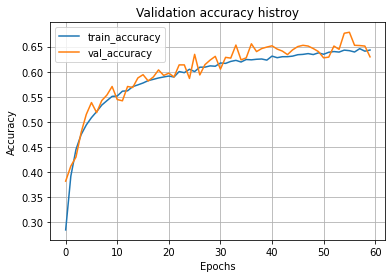

In [ ]:
plt.plot(history.history['accuracy'],label="train_accuracy")
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Validation accuracy histroy')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

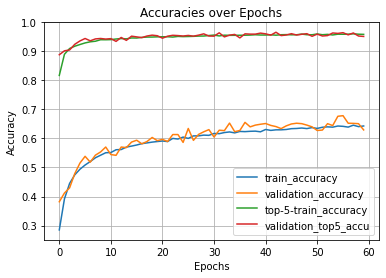

In [ ]:
plt.plot(history.history['accuracy'],label="train_accuracy")
plt.plot(history.history['val_accuracy'],label="validation_accuracy")
plt.plot(history.history['top-5-accuracy'],label="top-5-train_accuracy")
plt.plot(history.history['val_top-5-accuracy'],label="validation_top5_accu")
plt.title('Accuracies over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()